# Problem Statement

The problem at hand is to predict the housing prices of a town or a suburb based on the features of the locality provided to us. In the process, we need to identify the most important features in the dataset. We need to employ techniques of data preprocessing and build a linear regression model that predicts the prices for us.

# Data Information

Each record in the database describes a Boston suburb or town. The data was drawn from the Boston Standard Metropolitan Statistical Area (SMSA) in 1970 and is available [here](https://www.kaggle.com/datasets/puxama/bostoncsv). Detailed attribute information can be found below-

Attribute Information (in order):

- CRIM: per capita crime rate by town
- ZN: proportion of residential land zoned for lots over 25,000 sq. ft.
- INDUS: proportion of non-retail business acres per town
- CHAS: Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
- NX: nitric oxides concentration (parts per 10 million)
- RM: average number of rooms per dwelling
- AGE: proportion of owner-occupied units built prior to 1940
- DIS: weighted distances to five Boston employment centers
- RAD: index of accessibility to radial highways
- TAX: full-value property-tax rate per 10,000 dollars
- PTRATIO: pupil-teacher ratio by town
- LSTAT: %lower status of the population
- MEDV: Median value of owner-occupied homes in 1000 dollars.

In [5]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# for splitting the data
from sklearn.model_selection import train_test_split

# for model building
import statsmodels.api as sm

# to check model metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [6]:
df = pd.read_csv('/home/mojave/Housing-Price-Prediction/Boston.csv', index_col=0)

df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
1,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
2,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
3,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
5,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


In [7]:
df.shape

(506, 14)

In [8]:
# number of variables and their data type
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 506 entries, 1 to 506
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   crim     506 non-null    float64
 1   zn       506 non-null    float64
 2   indus    506 non-null    float64
 3   chas     506 non-null    int64  
 4   nox      506 non-null    float64
 5   rm       506 non-null    float64
 6   age      506 non-null    float64
 7   dis      506 non-null    float64
 8   rad      506 non-null    int64  
 9   tax      506 non-null    int64  
 10  ptratio  506 non-null    float64
 11  black    506 non-null    float64
 12  lstat    506 non-null    float64
 13  medv     506 non-null    float64
dtypes: float64(11), int64(3)
memory usage: 59.3 KB


There are no missing value in the data

In [9]:
# statistical summary of the data
df.describe().T

,count,mean,std,min,25%,50%,75%,max
crim,506.0,3.613524,8.601545,0.00632,0.082045,0.25651,3.677083,88.9762
zn,506.0,11.363636,23.322453,0.00000,0.000000,0.00000,12.500000,100.0000
indus,506.0,11.136779,6.860353,0.46000,5.190000,9.69000,18.100000,27.7400
chas,506.0,0.069170,0.253994,0.00000,0.000000,0.00000,0.000000,1.0000
nox,506.0,0.554695,0.115878,0.38500,0.449000,0.53800,0.624000,0.8710
rm,506.0,6.284634,0.702617,3.56100,5.885500,6.20850,6.623500,8.7800
age,506.0,68.574901,28.148861,2.90000,45.025000,77.50000,94.075000,100.0000
dis,506.0,3.795043,2.105710,1.12960,2.100175,3.20745,5.188425,12.1265
rad,506.0,9.549407,8.707259,1.00000,4.000000,5.00000,24.000000,24.0000
tax,506.0,408.237154,168.537116,187.00000,279.000000,330.00000,666.000000,711.0000


In [10]:
# checking duplicated values
df.duplicated()

1      False
2      False
3      False
4      False
5      False
       ...  
502    False
503    False
504    False
505    False
506    False
Length: 506, dtype: bool

# Exploratory Data Analysis

### Distribution Plots

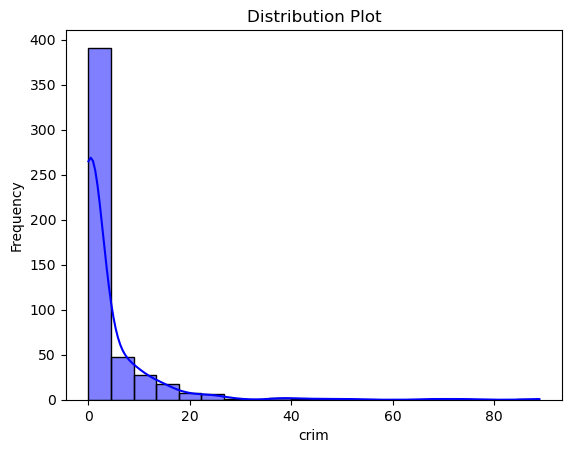

In [11]:
# ditribution plot for 'crim'
sns.histplot(df['crim'], kde=True, color='blue', bins=20)
plt.title('Distribution Plot')
plt.xlabel('crim')
plt.ylabel('Frequency')
plt.show()

- Extremely right-skewed distribution with most values clustered near zero.
- Sharp peak at the lowest crime rates, indicating a high frequency of low-crime areas.
- Rapidly decreasing frequency as crime rates increase.
- Very few high-crime outliers beyond a value of 20.
- KDE curve confirms the heavy concentration of low values.

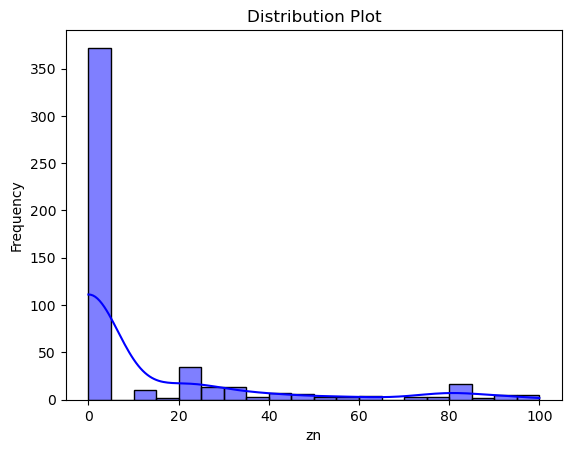

In [12]:
# ditribution plot for 'zn'
sns.histplot(df['zn'], kde=True, color='blue', bins=20)
plt.title('Distribution Plot')
plt.xlabel('zn')
plt.ylabel('Frequency')
plt.show()

- Extremely right-skewed distribution with a dominant peak at zero.
- Majority of observations have a value of 0 for "zn".
- Few scattered frequencies at higher values (20, 80).
- KDE curve shows a steep drop after zero.
- Indicates most areas have no or minimal "zn" values, with rare high-value outliers.

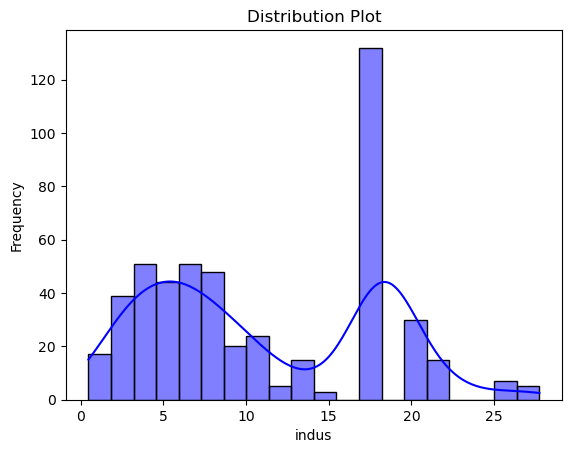

In [13]:
# ditribution plot for 'indus'
sns.histplot(df['indus'], kde=True, color='blue', bins=20)
plt.title('Distribution Plot')
plt.xlabel('indus')
plt.ylabel('Frequency')
plt.show()

- Bimodal distribution with two distinct peaks around 7 and 19.
- Lower frequencies between the peaks, indicating fewer observations in the mid-range.

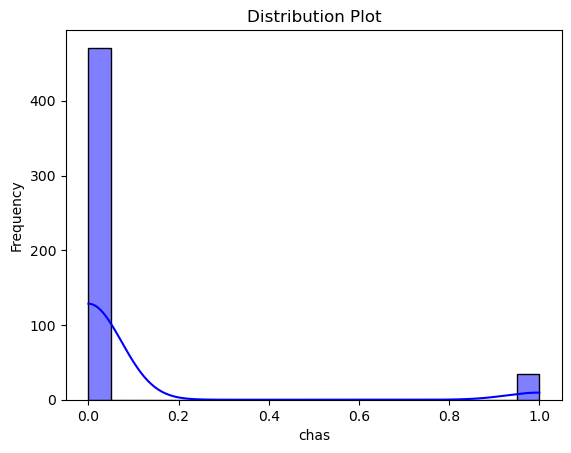

In [14]:
# ditribution plot for 'chas'
sns.histplot(df['chas'], kde=True, color='blue', bins=20)
plt.title('Distribution Plot')
plt.xlabel('chas')
plt.ylabel('Frequency')
plt.show()

- Extremely right-skewed distribution with a dominant peak at 0.
- Minimal frequency for values greater than 0, with a tiny peak at 1.
- KDE curve shows a steep decline after 0.
- Indicates a binary or highly imbalanced feature with rare occurrences of non-zero values.

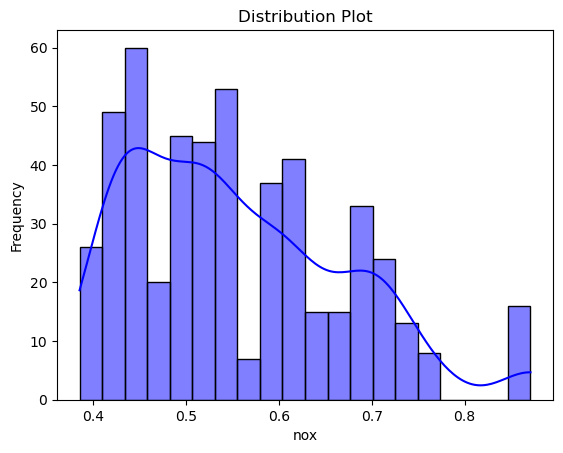

In [15]:
# ditribution plot for 'nox'
sns.histplot(df['nox'], kde=True, color='blue', bins=20)
plt.title('Distribution Plot')
plt.xlabel('nox')
plt.ylabel('Frequency')
plt.show()

- Approximately normal distribution with a slight right skew.
- Peak frequency around 0.55 for "nox" values.
- Gradual decline in frequency as "nox" values increase beyond the peak.
- KDE curve confirms the central tendency around 0.55.

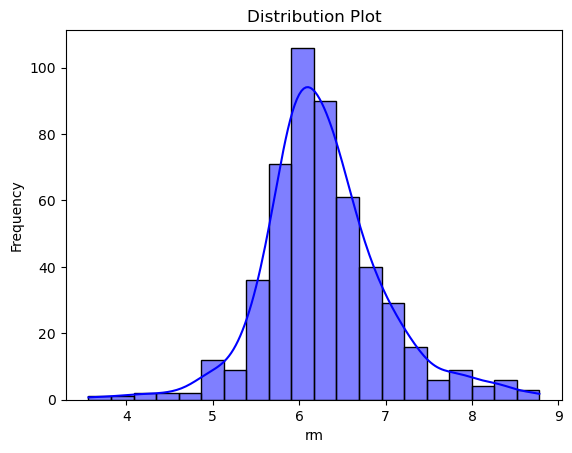

In [16]:
# ditribution plot for 'rm'
sns.histplot(df['rm'], kde=True, color='blue', bins=20)
plt.title('Distribution Plot')
plt.xlabel('rm')
plt.ylabel('Frequency')
plt.show()

- Symmetric, bell-shaped distribution resembling a normal distribution.
- Peak frequency centered around a value of 6
- Gradual and balanced decline in frequency on both sides of the peak.
- KDE curve confirms the normal distribution shape.

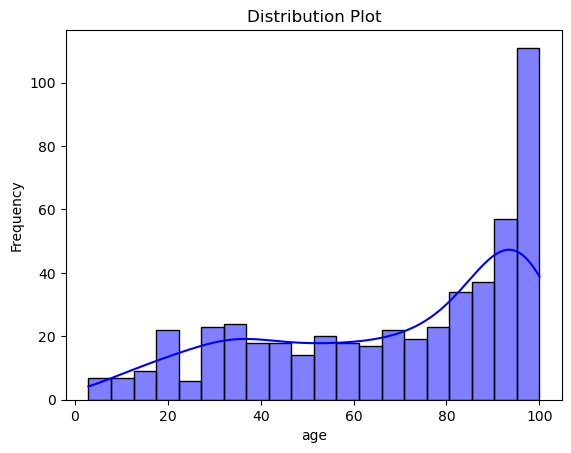

In [17]:
# ditribution plot for 'age'
sns.histplot(df['age'], kde=True, color='blue', bins=20)
plt.title('Distribution Plot')
plt.xlabel('age')
plt.ylabel('Frequency')
plt.show()

- Right-skewed distribution with a long tail toward higher ages.
- Two distinct peaks: one around 30–50 and another sharp peak at age 100.
- Suggests a **bimodal distribution** with lower frequencies in middle ages (50–80).
- Possible data clustering or sampling bias around age 100.
- Irregularities/gaps in the 50–80 age range indicate uneven distribution.

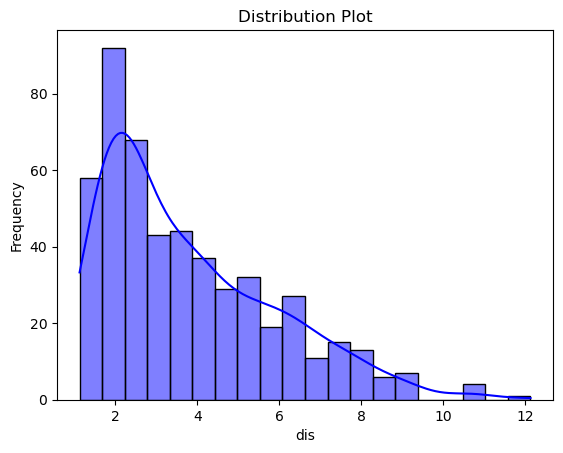

In [18]:
# ditribution plot for 'dis'
sns.histplot(df['dis'], kde=True, color='blue', bins=20)
plt.title('Distribution Plot')
plt.xlabel('dis')
plt.ylabel('Frequency')
plt.show()

- Strongly right-skewed distribution
- Highest frequency at lower values, peaking around 2.
- Rapid decline in frequency as values increase.
- KDE curve shows a steep drop-off after the peak.
- Few outliers at higher values.

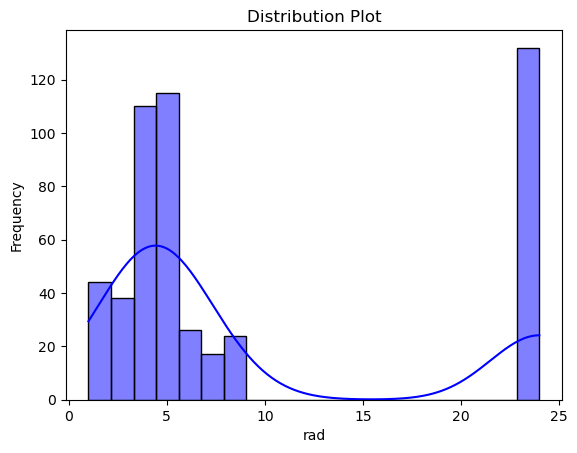

In [19]:
# ditribution plot for 'rad'
sns.histplot(df['rad'], kde=True, color='blue', bins=20)
plt.title('Distribution Plot')
plt.xlabel('rad')
plt.ylabel('Frequency')
plt.show()

- Bimodal distribution with two distinct peaks.
- Primary peak around a value of 5.
- Secondary peak at the maximum value of 24-25.
- Low frequencies between the peaks, indicating fewer observations in the mid-range.
- KDE curve highlights the two modes clearly.

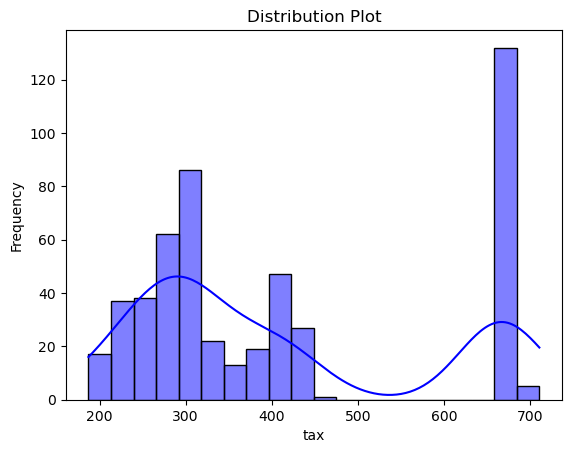

In [20]:
# ditribution plot for 'tax'
sns.histplot(df['tax'], kde=True, color='blue', bins=20)
plt.title('Distribution Plot')
plt.xlabel('tax')
plt.ylabel('Frequency')
plt.show()

- Bimodal distribution with two distinct peaks.
- Primary peak around 300.
- Secondary, sharper peak at 666-700.
- Low frequencies between the peaks and beyond 400.
- KDE curve highlights the two modes and a trough in the middle.

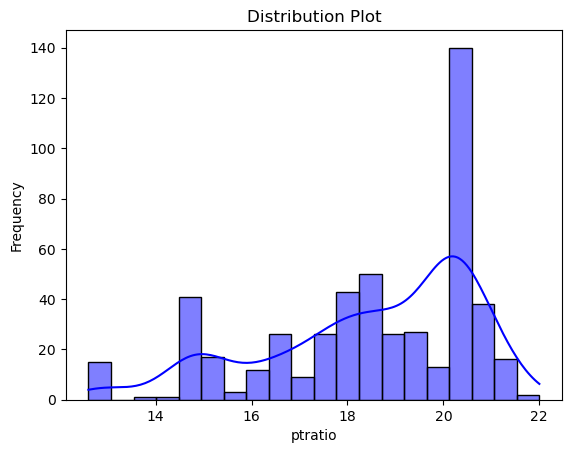

In [21]:
# ditribution plot for 'ptratio'
sns.histplot(df['ptratio'], kde=True, color='blue', bins=20)
plt.title('Distribution Plot')
plt.xlabel('ptratio')
plt.ylabel('Frequency')
plt.show()

- Right-skewed distribution with a dominant peak around 20.
- High frequency of observations near 20.
- Gradual increase in frequency leading up to the peak.
- KDE curve shows a steep rise and fall around the peak.
- Sparse frequencies at lower and higher ends.

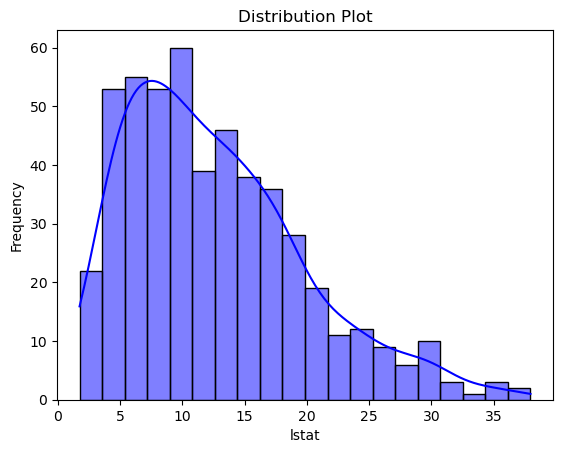

In [22]:
# ditribution plot for 'lstat'
sns.histplot(df['lstat'], kde=True, color='blue', bins=20)
plt.title('Distribution Plot')
plt.xlabel('lstat')
plt.ylabel('Frequency')
plt.show()

- Right-skewed distribution
- Peak frequency around a value of 10.
- Gradual decline in frequency as values increase.
- KDE curve shows a smooth decline after the peak.
- Few observations at higher "lstat" values, indicating a long right tail.

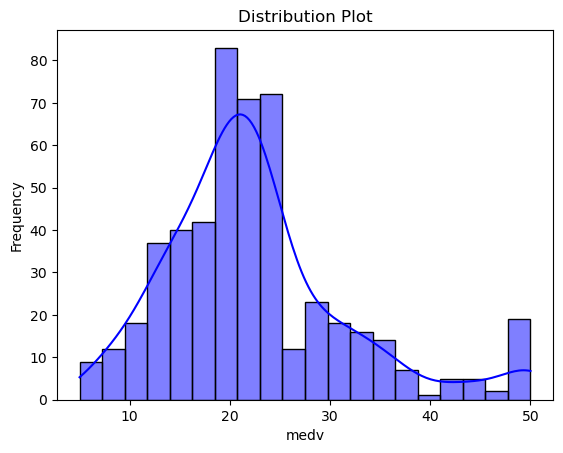

In [23]:
# ditribution plot for 'medv'
sns.histplot(df['medv'], kde=True, color='blue', bins=20)
plt.title('Distribution Plot')
plt.xlabel('medv')
plt.ylabel('Frequency')
plt.show()

- Approximately normal distribution with a slight right skew.
- Peak frequency around a value of 20.
- Gradual decline in frequency as values move away from the peak.
- KDE curve confirms the central tendency around 20.
- Small secondary peak near the value of 50, indicating potential outliers or a distinct subgroup.

### Scatterplot

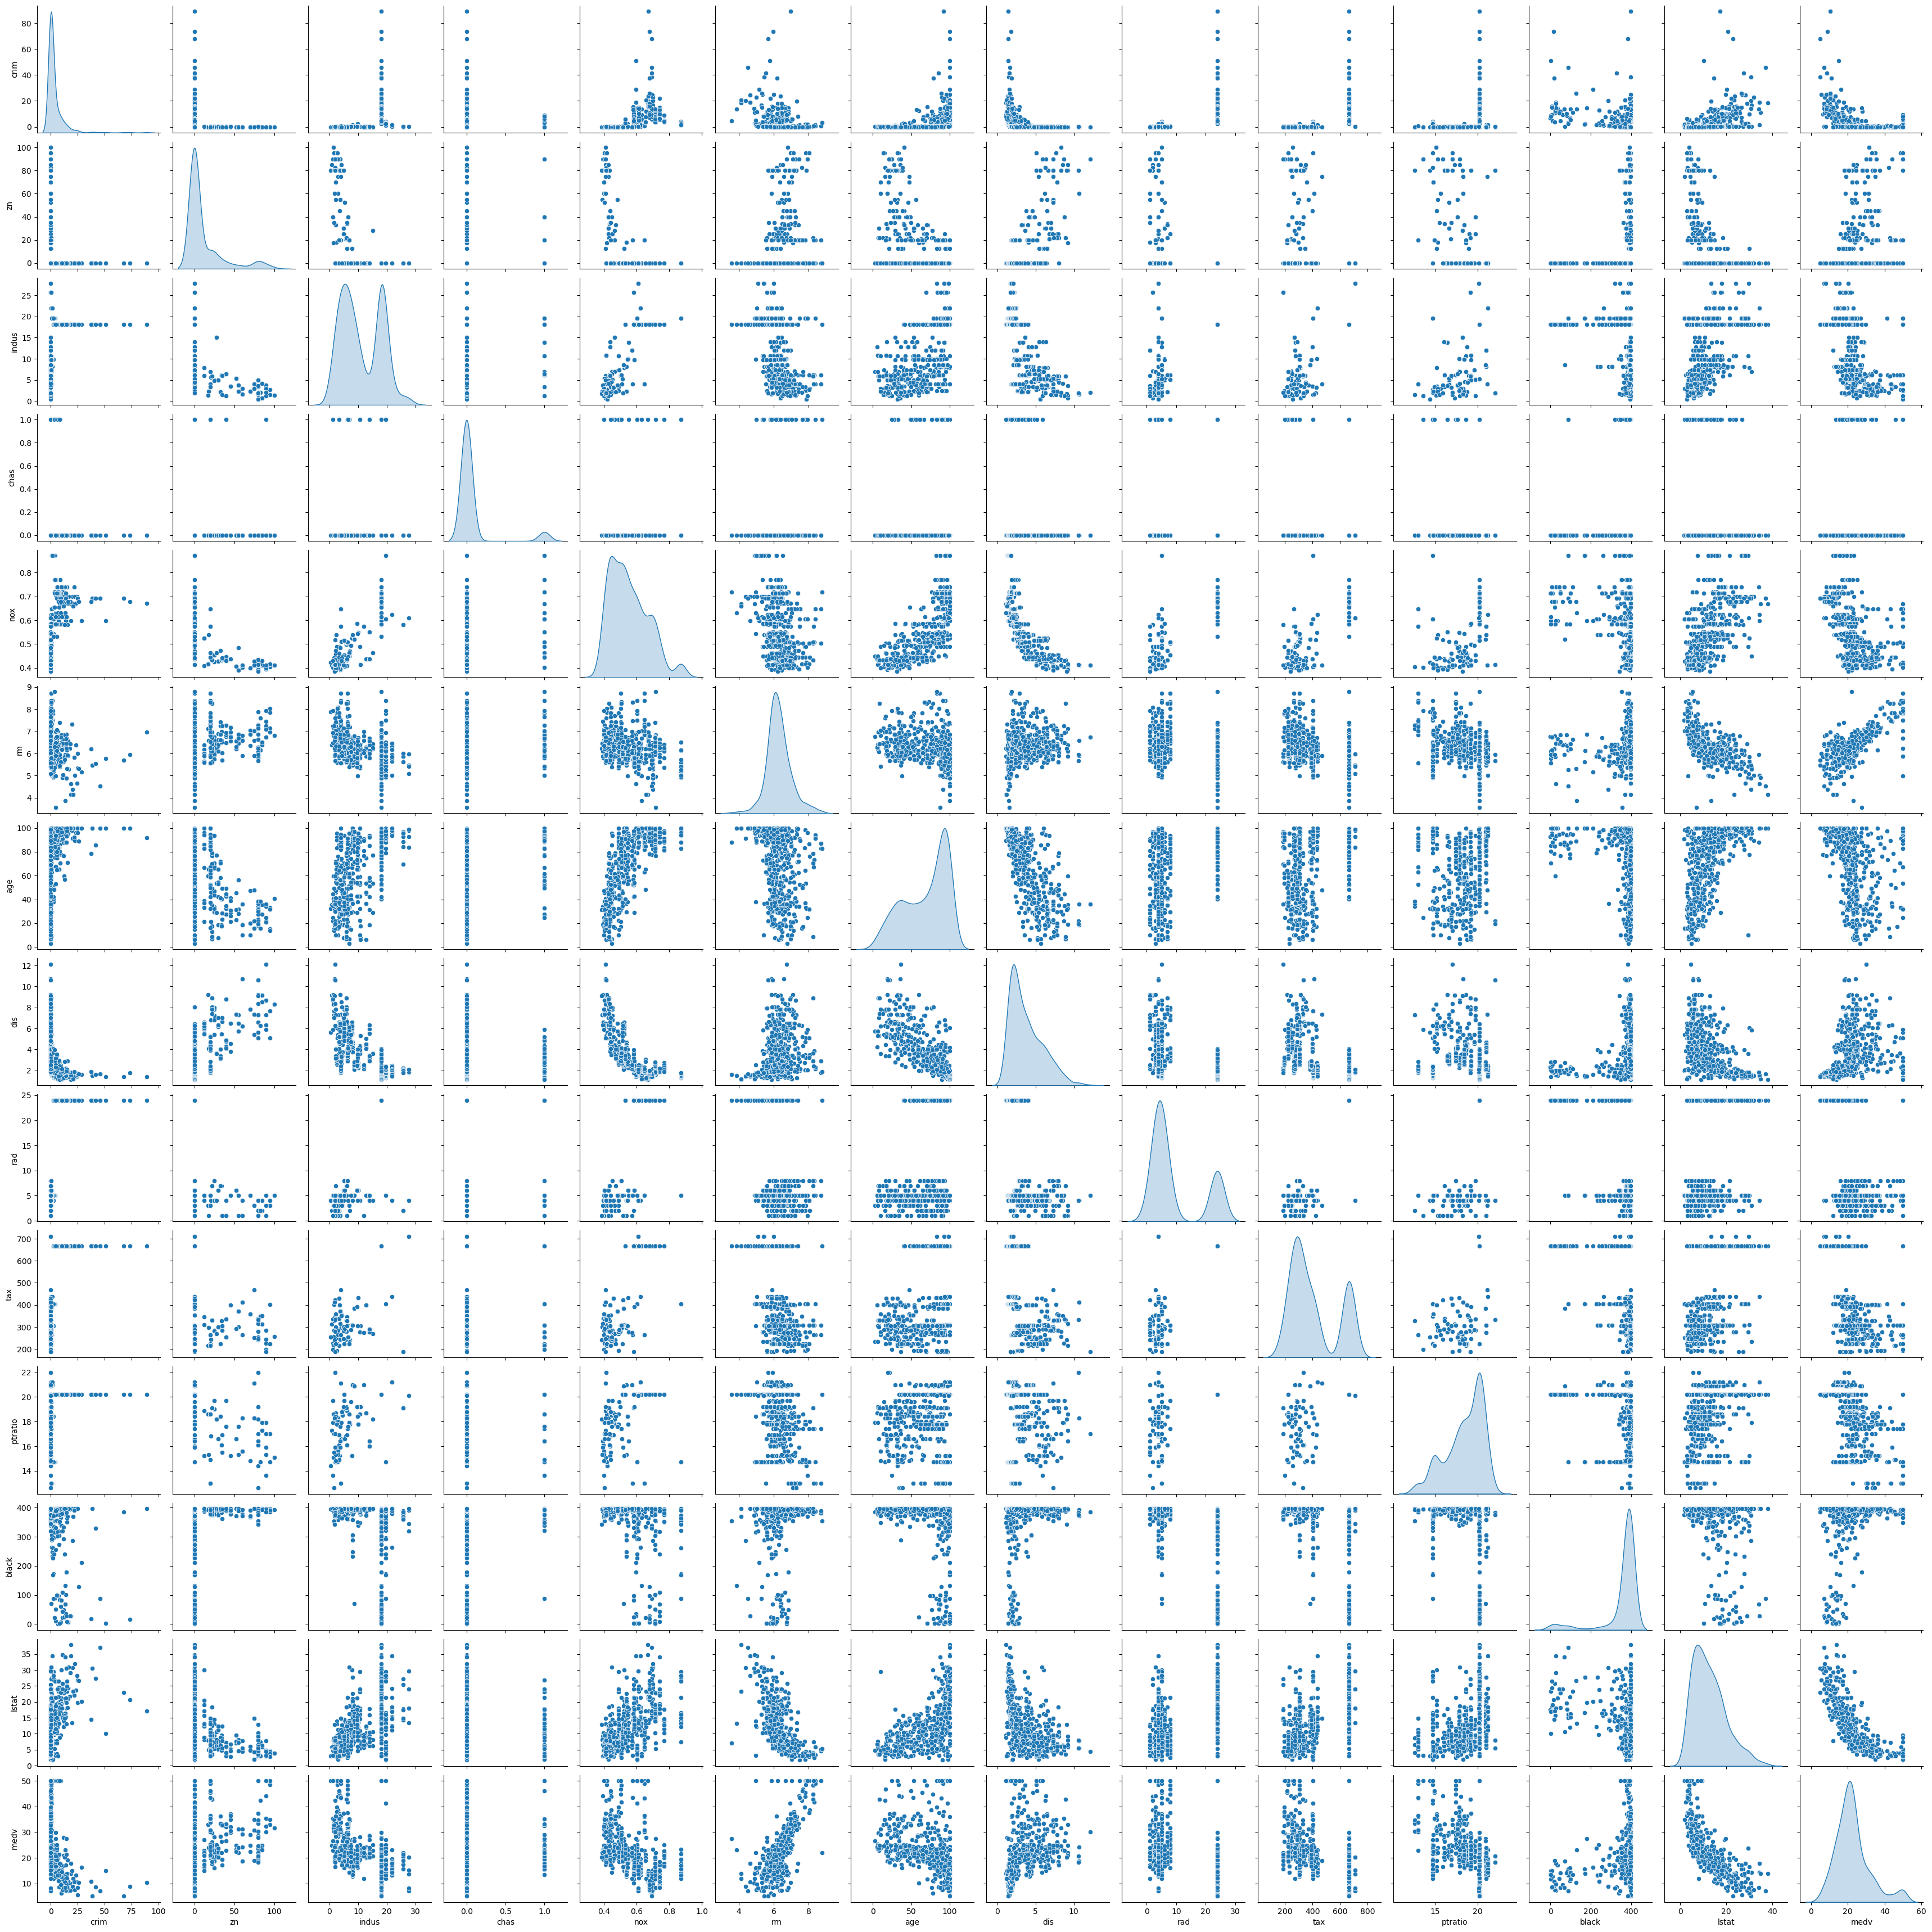

In [24]:
# pairplot of the features
df_attr = df.iloc[:, 0:14]
sns.pairplot(df_attr, diag_kind="kde")

- **crim**: Strong negative correlation with `medv`; higher crime rates lower home values.

- **zn**: Mostly zero values; no clear correlation with `medv`.

- **indus**: Slight negative correlation; higher industrial areas lower home values.

- **nox**: Negative correlation; higher pollution lowers home values.

- **rm**: Strong positive correlation; more rooms increase home values.

- **age**: Negative correlation; older homes have lower values.

- **dis**: Slight negative correlation; farther distances lower home values.

- **rad**: Negative correlation; better highway access lowers home values.

- **tax**: Strong negative correlation; higher taxes lower home values.

- **ptratio**: Negative correlation; higher pupil-teacher ratios lower home values.

- **lstat**: Strong negative correlation; higher lower status population lowers home values.

- **medv**: Approximately normal distribution; peak around 22.

Overall, RM and LSTAT show the strongest linear relationships with MEDV. Some features show non-linear patterns or less clear correlations.

### Heatmap

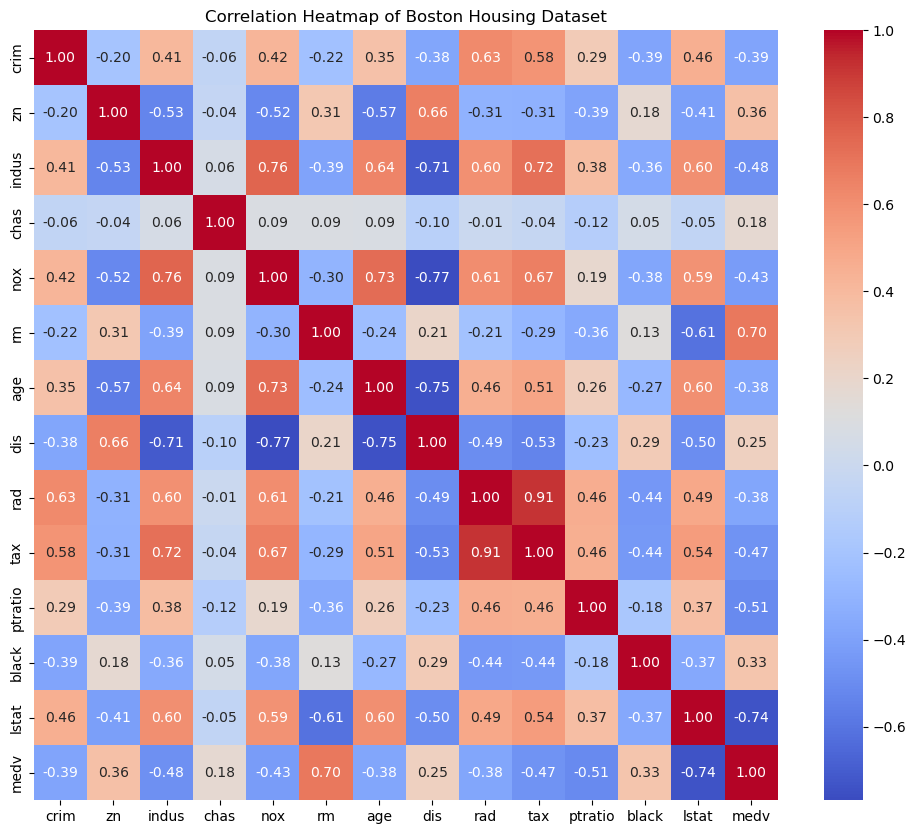

In [25]:
plt.figure(figsize=(12, 10))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Boston Housing Dataset')
plt.show()

- **crim**: Strong positive correlation with **tax**, **rad**, and **lstat**; strong negative correlation with **medv**.

- **zn**: Strong positive correlation with **medv**; negative correlation with **indus** and **age**.

- **indus**: Strong positive correlation with **tax** and **age**; strong negative correlation with **medv**.

- **chas**: Weak correlations with most features.

- **nox**: Strong positive correlation with **indus** and **age**; strong negative correlation with **dis** and **medv**.

- **rm**: Strong positive correlation with **medv**; negative correlation with **lstat** and **ptratio**.

- **age**: Strong positive correlation with **tax**; strong negative correlation with **medv**.

- **dis**: Strong positive correlation with **medv**; strong negative correlation with **nox**, **indus**, **age**, and **tax**.

- **rad**: Strong positive correlation with **tax** and **indus**; negative correlation with **medv**.

- **tax**: Strong positive correlation with **indus**, **ptratio**, and **age**; strong negative correlation with **medv**.

- **ptratio**: Strong positive correlation with **lstat**; strong negative correlation with **medv**.

- **lstat**: Strong positive correlation with **ptratio**, strongest negative correlation with **medv**.

- **medv**: Strong positive correlation with **rm** and **dis**; strong negative correlation with **lstat**, **ptratio**, **tax**, **indus**, and **crim**.

# Model Building

### Create Dummy Variables using One-Hot Encoding

In [26]:
# drop_first=True will drop one of the chas columns
df = pd.get_dummies(df, columns=["chas"], drop_first=True)
df.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv,chas_1
1,0.00632,18.0,2.31,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0,False
2,0.02731,0.0,7.07,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6,False
3,0.02729,0.0,7.07,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7,False
4,0.03237,0.0,2.18,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4,False
5,0.06905,0.0,2.18,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2,False


### Splitting the data

In [27]:
# independent variables
X = df.drop(["medv"], axis=1)
# dependent variable
y = df[["medv"]]

In [28]:
# let's add the intercept to data
X = sm.add_constant(X)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=42)

In [30]:
print(X_train.head())

     const      crim   zn  indus    nox     rm   age     dis  rad  tax  \
6      1.0   0.02985  0.0   2.18  0.458  6.430  58.7  6.0622    3  222   
117    1.0   0.13158  0.0  10.01  0.547  6.176  72.5  2.7301    6  432   
46     1.0   0.17142  0.0   6.91  0.448  5.682  33.8  5.1004    3  233   
17     1.0   1.05393  0.0   8.14  0.538  5.935  29.3  4.4986    4  307   
469    1.0  15.57570  0.0  18.10  0.580  5.926  71.0  2.9084   24  666   

     ptratio   black  lstat  chas_1  
6       18.7  394.12   5.21   False  
117     17.8  393.30  12.04   False  
46      17.9  396.90  10.21   False  
17      21.0  386.85   6.58   False  
469     20.2  368.74  18.13   False  


In [31]:
print(X_test.head())

     const     crim    zn  indus    nox     rm   age     dis  rad  tax  \
174    1.0  0.09178   0.0   4.05  0.510  6.416  84.1  2.6463    5  296   
275    1.0  0.05644  40.0   6.41  0.447  6.758  32.9  4.0776    4  254   
492    1.0  0.10574   0.0  27.74  0.609  5.983  98.8  1.8681    4  711   
73     1.0  0.09164   0.0  10.81  0.413  6.065   7.8  5.2873    4  305   
453    1.0  5.09017   0.0  18.10  0.713  6.297  91.8  2.3682   24  666   

     ptratio   black  lstat  chas_1  
174     16.6  395.50   9.04   False  
275     17.6  396.90   3.53    True  
492     20.1  390.11  18.07   False  
73      19.2  390.91   5.52   False  
453     20.2  385.09  17.27   False  


### Fit the model

#### Train Set

In [32]:
# Convert boolean columns to integer type
X_train = X_train.astype(float)

olsmod = sm.OLS(y_train, X_train)
olsres = olsmod.fit()

In [33]:
# let's print the regression summary
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.743
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     75.81
Date:                Tue, 19 Aug 2025   Prob (F-statistic):           4.96e-92
Time:                        20:59:29   Log-Likelihood:                -1053.8
No. Observations:                 354   AIC:                             2136.
Df Residuals:                     340   BIC:                             2190.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         31.6311      6.056      5.223      0.0

#### Test Set

In [34]:
X_test = X_test.astype(float)

olsmod = sm.OLS(y_test, X_test)
olsres = olsmod.fit()

In [35]:
print(olsres.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.757
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     33.11
Date:                Tue, 19 Aug 2025   Prob (F-statistic):           4.90e-36
Time:                        20:59:29   Log-Likelihood:                -435.73
No. Observations:                 152   AIC:                             899.5
Df Residuals:                     138   BIC:                             941.8
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         49.6272      9.855      5.036      0.0

#### **The model is giving R-square of 0.743, it means that the model explains 74.3% variability in the train set.**

# Check for Multicollinearity

In [39]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const      553.028123
crim         1.731586
zn           2.394452
indus        3.836487
nox          4.627219
rm           1.913056
age          2.996110
dis          3.971023
rad          7.534681
tax          8.879471
ptratio      1.821880
black        1.265533
lstat        2.679332
chas_1       1.102642
dtype: float64



Only `tax` and `rad` have moderate multicollinearity (i.e. > 5)

In [50]:
# dropping `tax` and observing the effect on the model
X_train1 = X_train.drop(["tax"], axis=1)
olsmod_1 = sm.OLS(y_train, X_train1)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

KeyError: "['tax'] not found in axis"

In [51]:
X_train2 = X_train.drop(["rad"], axis=1)
olsmod_2 = sm.OLS(y_train, X_train2)
olsres_2 = olsmod_2.fit()
print(
    "R-squared:",
    np.round(olsres_2.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_2.rsquared_adj, 3),
)

R-squared: 0.736 
Adjusted R-squared: 0.728


Since there is no effect on R-squared after dropping `tax`, we can remove it from the train set

In [52]:
X_train = X_train.drop(["tax"], axis=1)

KeyError: "['tax'] not found in axis"

In [53]:
olsmod_3 = sm.OLS(y_train, X_train)
olsres_3 = olsmod_3.fit()
print(olsres_5.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     81.22
Date:                Tue, 19 Aug 2025   Prob (F-statistic):           3.09e-92
Time:                        21:20:06   Log-Likelihood:                -1055.6
No. Observations:                 354   AIC:                             2137.
Df Residuals:                     341   BIC:                             2187.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.3910      6.042      5.030      0.0

In [57]:
# checking if multicollearity still exists
vif_series1 = pd.Series(
    [variance_inflation_factor(X_train.values, i) for i in range(X_train.shape[1])],
    index=X_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))

VIF values: 

const      546.506672
crim         1.731423
zn           2.196915
indus        3.167521
nox          4.597087
rm           1.905910
age          2.995862
dis          3.963832
rad          2.893213
ptratio      1.803749
black        1.264352
lstat        2.678812
chas_1       1.088819
dtype: float64



**After dropping `tax`, there is no multicollinearity in the data.**

In [59]:
# building the model with the new data
olsmod_4 = sm.OLS(y_train, X_train)
olsres_4 = olsmod_4.fit()
print(olsres_4.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.732
Method:                 Least Squares   F-statistic:                     81.22
Date:                Tue, 19 Aug 2025   Prob (F-statistic):           3.09e-92
Time:                        21:26:05   Log-Likelihood:                -1055.6
No. Observations:                 354   AIC:                             2137.
Df Residuals:                     341   BIC:                             2187.
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.3910      6.042      5.030      0.0

Now, since there is no multicollearity, we can drop variables which have p-value > 0.05

In [70]:
# dropping `indus` and checking model metrics
X_train3 = X_train.drop(["indus"], axis=1)
olsmod_5 = sm.OLS(y_train, X_train3)
olsres_5 = olsmod_5.fit()
print(olsres_5.summary())

KeyError: "['indus'] not found in axis"

In [71]:
# dropping `age` and checking model metrics
X_train4 = X_train.drop(["age"], axis=1)
olsmod_6 = sm.OLS(y_train, X_train4)
olsres_6 = olsmod_6.fit()
print(olsres_6.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.740
Model:                            OLS   Adj. R-squared:                  0.733
Method:                 Least Squares   F-statistic:                     97.85
Date:                Tue, 19 Aug 2025   Prob (F-statistic):           4.02e-94
Time:                        21:59:06   Log-Likelihood:                -1055.8
No. Observations:                 354   AIC:                             2134.
Df Residuals:                     343   BIC:                             2176.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.5846      6.021      5.080      0.0

In [72]:
# dropping `zn` and checking model metrics
X_train5 = X_train.drop(["zn"], axis=1)
olsmod_7 = sm.OLS(y_train, X_train5)
olsres_7 = olsmod_7.fit()
print(olsres_7.summary())

                            OLS Regression Results                            
Dep. Variable:                   medv   R-squared:                       0.739
Model:                            OLS   Adj. R-squared:                  0.731
Method:                 Least Squares   F-statistic:                     97.10
Date:                Tue, 19 Aug 2025   Prob (F-statistic):           1.05e-93
Time:                        21:59:44   Log-Likelihood:                -1056.9
No. Observations:                 354   AIC:                             2136.
Df Residuals:                     343   BIC:                             2178.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         30.9523      6.034      5.130      0.0

# Assumptions of Linear Regression

These assumptions are essential conditions that should be met before we draw inferences regarding the model estimates or use the model to make a prediction.

For Linear Regression, we need to check if the following assumptions hold:-
- Linearity
- Independence
- Homoscedasticity
- Normality of error terms
- No strong Multicollinearity


These assumptions are essential conditions that should be met before we draw inferences regarding the model estimates or use the model to make a prediction.

For Linear Regression, we need to check if the following assumptions hold:-
- Linearity
- Independence
- Homoscedasticity
- Normality of error terms
- No strong Multicollinearity

In [37]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsres_10.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsres_10.resid.values  # residuals

df_pred.head()


NameError: name 'olsres_10' is not defined